In [38]:
#https://github.com/jhelto12/4105_Intro_to_ML/tree/main/Homework%203
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes

url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/diabetes.csv"
diabetes_df = pd.read_csv(url)

In [39]:
#split the diabetes dataset (input and output)
diabetes_X = diabetes_df.drop('Outcome', axis=1)
diabetes_Y = diabetes_df['Outcome']

#split the diabetes datasets (train and test)
diabetes_X_train, diabetes_X_test, diabetes_Y_train, diabetes_Y_test = train_test_split(diabetes_X, diabetes_Y, test_size=0.2, random_state=42)

#load in the dataset from sklearn library
cancer_data = load_breast_cancer()

#bring in cancer dataset as data and target
cancer_X = cancer_data.data
cancer_y = cancer_data.target

#split the cancer datasets (train and test)
cancer_X_train, cancer_X_test, cancer_Y_train, cancer_Y_test = train_test_split(cancer_X, cancer_y, test_size=0.2, random_state=42)

#create cancer dataframe from dataset
cancer_df = pd.DataFrame(cancer_X_train, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_Y_train

In [40]:
#initialize the scaler function
scaler = StandardScaler()

#scale the diabetes dataframe
diabetes_X_train = scaler.fit_transform(diabetes_X_train)
diabetes_X_test = scaler.transform(diabetes_X_test)

#scale the cancer dataframe
cancer_df[cancer_data.feature_names] = scaler.fit_transform(cancer_df[cancer_data.feature_names])

In [41]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
classifier = LogisticRegression(random_state=0)

# Fit the model on the training data
classifier.fit(diabetes_X_train, diabetes_Y_train)


LogisticRegression(random_state=0)

In [42]:
diabetes_predictions = classifier.predict(diabetes_X_test)
diabetes_predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [43]:
from sklearn.metrics import confusion_matrix
cfn_matrix_diabetes = confusion_matrix(diabetes_Y_test, diabetes_predictions)
print(cfn_matrix_diabetes)

[[79 20]
 [18 37]]


In [44]:
from sklearn import metrics
print("Accuracy:\t",metrics.accuracy_score(diabetes_Y_test, diabetes_predictions))
print("Precision:\t",metrics.precision_score(diabetes_Y_test, diabetes_predictions))
print("Recall: \t",metrics.recall_score(diabetes_Y_test, diabetes_predictions))
print("F1 Score:\t",metrics.f1_score(diabetes_Y_test, diabetes_predictions))


Accuracy:	 0.7532467532467533
Precision:	 0.6491228070175439
Recall: 	 0.6727272727272727
F1 Score:	 0.6607142857142857


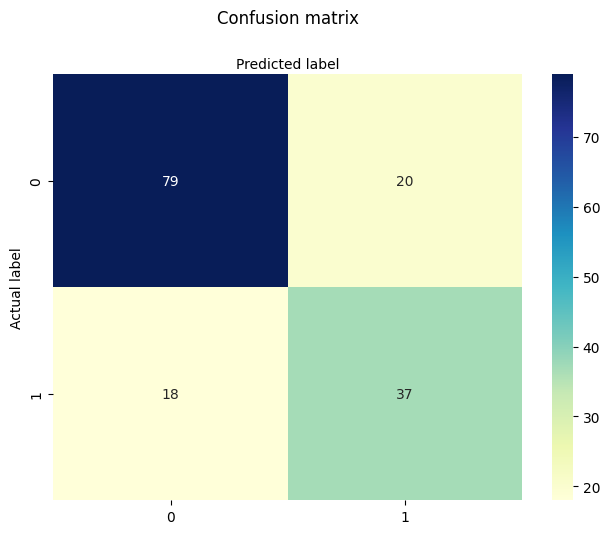

In [45]:
import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cfn_matrix_diabetes), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

The results of running the logistic regression model on the diabetes dataset leaves a lot to be desired. With only somewhere between a 60% and 70% accuracy, recall, and F1 Score, a lot more can be done for this dataset before the results can be useful.

In [46]:
# Initialize the logistic regression model
classifier = LogisticRegression(random_state=0)

# Fit the model on the training data
classifier.fit(cancer_df[cancer_data.feature_names], cancer_df['target'])

LogisticRegression(random_state=0)

In [47]:
cancer_predictions = classifier.predict(cancer_df[cancer_data.feature_names])
cancer_predictions[0:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [48]:
cfn_matrix_cancer = confusion_matrix(cancer_df['target'], cancer_predictions)
print(cfn_matrix_cancer)

[[165   4]
 [  2 284]]


In [49]:
print('Accuracy:\t',metrics.accuracy_score(cancer_df['target'], cancer_predictions))
print('Precision:\t',metrics.precision_score(cancer_df['target'], cancer_predictions))
print('Recall: \t',metrics.recall_score(cancer_df['target'], cancer_predictions))
print('F1 Score:\t',metrics.f1_score(cancer_df['target'], cancer_predictions))

Accuracy:	 0.9868131868131869
Precision:	 0.9861111111111112
Recall: 	 0.993006993006993
F1 Score:	 0.9895470383275261


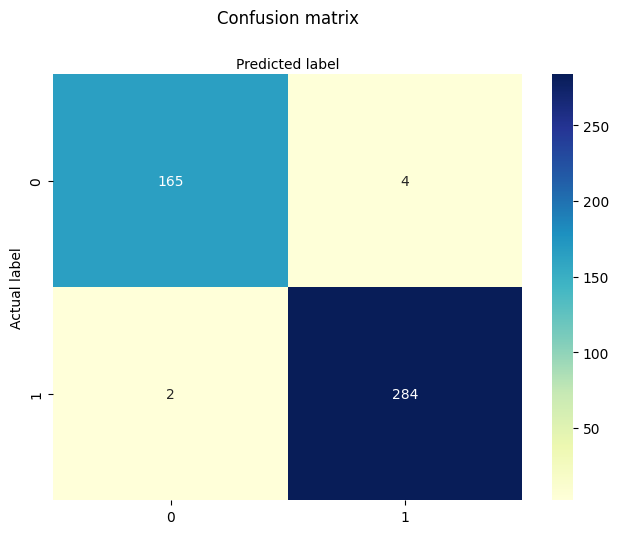

In [50]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heat map
sns.heatmap(pd.DataFrame(cfn_matrix_cancer), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

Running the logistic regression model on the Cancer dataset has shown to be significantly more effective at predicting cancer

In [51]:
#initialize the logistic regression model with penalties
classifier = LogisticRegression(
    solver='liblinear',
    penalty='l1',
    C=1,
    random_state=0
)

classifier.fit(cancer_df[cancer_data.feature_names], cancer_df['target'])

LogisticRegression(C=1, penalty='l1', random_state=0, solver='liblinear')

In [52]:
cancer_predictions_penalties = classifier.predict(cancer_df[cancer_data.feature_names])
cancer_predictions_penalties[0:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [53]:
cfn_matrix_cancer_penalties = confusion_matrix(cancer_df['target'], cancer_predictions_penalties)
print(cfn_matrix_cancer_penalties)

[[166   3]
 [  2 284]]


In [54]:
print('Accuracy:\t',metrics.accuracy_score(cancer_df['target'], cancer_predictions_penalties))
print('Precision:\t',metrics.precision_score(cancer_df['target'], cancer_predictions_penalties))
print('Recall: \t',metrics.recall_score(cancer_df['target'], cancer_predictions_penalties))
print('F1 Score:\t',metrics.f1_score(cancer_df['target'], cancer_predictions_penalties))

Accuracy:	 0.989010989010989
Precision:	 0.9895470383275261
Recall: 	 0.993006993006993
F1 Score:	 0.9912739965095986


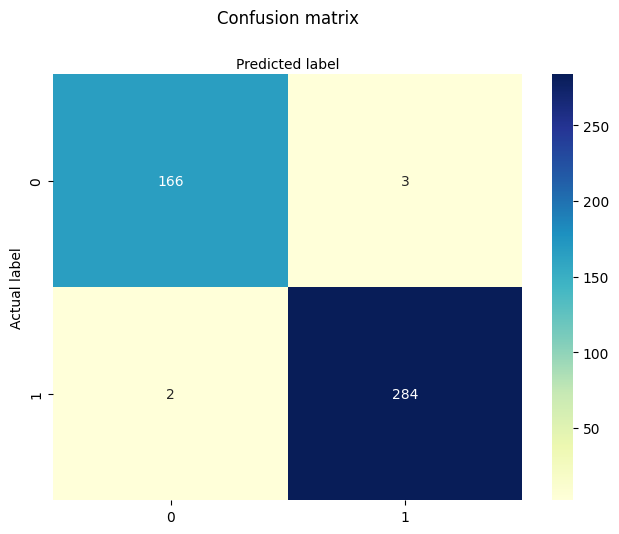

In [55]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heat map
sns.heatmap(pd.DataFrame(cfn_matrix_cancer_penalties), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

The results from this section were slightly improved in all four metrics. This seems to indicate that adding in penalties can improve the model.

In [56]:
from sklearn.naive_bayes import GaussianNB

#initialize the logistic regression model with penalties
classifier = GaussianNB()

classifier.fit(cancer_df[cancer_data.feature_names], cancer_df['target'])


GaussianNB()

In [57]:
cancer_predictions_gaussian = classifier.predict(cancer_df[cancer_data.feature_names])
cancer_predictions_gaussian[0:10]

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0])

In [58]:
cfn_matrix_cancer_gaussian = confusion_matrix(cancer_df['target'], cancer_predictions_gaussian)
print(cfn_matrix_cancer_gaussian)

[[150  19]
 [ 10 276]]


In [59]:
print('Accuracy:\t',metrics.accuracy_score(cancer_df['target'], cancer_predictions_gaussian))
print('Precision:\t',metrics.precision_score(cancer_df['target'], cancer_predictions_gaussian))
print('Recall: \t',metrics.recall_score(cancer_df['target'], cancer_predictions_gaussian))
print('F1 Score:\t',metrics.f1_score(cancer_df['target'], cancer_predictions_gaussian))

Accuracy:	 0.9362637362637363
Precision:	 0.9355932203389831
Recall: 	 0.965034965034965
F1 Score:	 0.9500860585197934


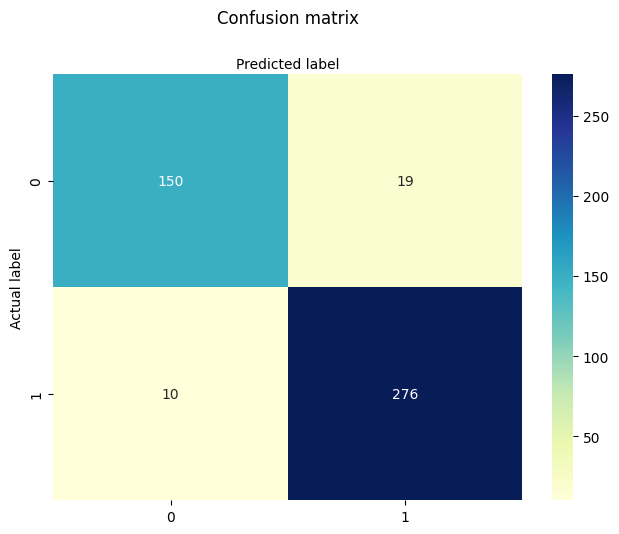

In [60]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heat map
sns.heatmap(pd.DataFrame(cfn_matrix_cancer_gaussian), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

After using the Gaussian Naive Bias model, results are noticeably worse than the previous tests done with this dataset. The difference in metrics between the Gaussian NB model and the logistic regression model might come down to the fact that the Gaussian NB model runs almost purely on statistical analysis, while the logistic regression is able to use the gradient descent algorithm to more precisely fine tune its parameters.

In [66]:
from sklearn.decomposition import PCA

pca_components = [1, 2, 5, 6, 7, 8, 9, 10, 20, 30]

for n in pca_components:
  pca = PCA(n_components=n)
  pca.fit(cancer_df[cancer_data.feature_names])
  cancer_df_pca = pca.transform(cancer_df[cancer_data.feature_names])

  explained_variance = pca.explained_variance_ratio_.sum()
  print(f"Number of components: {n}, Cumulative explained variance: {explained_variance:.2f}")


Number of components: 1, Cumulative explained variance: 0.44
Number of components: 2, Cumulative explained variance: 0.63
Number of components: 5, Cumulative explained variance: 0.85
Number of components: 6, Cumulative explained variance: 0.89
Number of components: 7, Cumulative explained variance: 0.91
Number of components: 8, Cumulative explained variance: 0.93
Number of components: 9, Cumulative explained variance: 0.94
Number of components: 10, Cumulative explained variance: 0.95
Number of components: 20, Cumulative explained variance: 1.00
Number of components: 30, Cumulative explained variance: 1.00


Here, I was trying to find a good K value that I could use for the tests. The goal was to find the smallest number of principle components that still met or exceeded 90% variance for the dataset. With that in mind, it looks like the optimal number of principle components might be 7.

In [62]:
for n in pca_components:
  pca = PCA(n_components=n)
  cancer_X_train_pca = pca.fit_transform(cancer_df[cancer_data.feature_names])
  cancer_X_test_pca = pca.transform(cancer_df[cancer_data.feature_names])

  classifier = GaussianNB()
  classifier.fit(cancer_X_train_pca, cancer_df['target'])

  cancer_predictions_gaussian_pca = classifier.predict(cancer_X_test_pca)
  cfn_matrix_cancer_gaussian_pca = confusion_matrix(cancer_df['target'], cancer_predictions_gaussian_pca)

In [63]:
print('Accuracy:\t',metrics.accuracy_score(cancer_df['target'], cancer_predictions_gaussian_pca))
print('Precision:\t',metrics.precision_score(cancer_df['target'], cancer_predictions_gaussian))
print('Recall: \t',metrics.recall_score(cancer_df['target'], cancer_predictions_gaussian))
print('F1 Score:\t',metrics.f1_score(cancer_df['target'], cancer_predictions_gaussian))

Accuracy:	 0.8637362637362638
Precision:	 0.9355932203389831
Recall: 	 0.965034965034965
F1 Score:	 0.9500860585197934


Here is the result of the Gaussian test using after having used the PCA method. There is a noticeable difference between the metrics in this test, but that is to be expected. Some of the data was lost because of the PCA method. This would mean that there is a noticeable, yet not debilitating, in the overall metrics of the test.

In [64]:
for n in pca_components:
  pca = PCA(n_components=n)
  cancer_X_train_pca = pca.fit_transform(cancer_df[cancer_data.feature_names])
  cancer_X_test_pca = pca.transform(cancer_df[cancer_data.feature_names])

  classifier = LogisticRegression()
  classifier.fit(cancer_X_train_pca, cancer_df['target'])

  cancer_predictions_logistic_pca = classifier.predict(cancer_X_test_pca)
  cfn_matrix_cancer_logistic_pca = confusion_matrix(cancer_df['target'], cancer_predictions_logistic_pca)

In [65]:
print('Accuracy:\t',metrics.accuracy_score(cancer_df['target'], cancer_predictions_logistic_pca))
print('Precision:\t',metrics.precision_score(cancer_df['target'], cancer_predictions_logistic_pca))
print('Recall: \t',metrics.recall_score(cancer_df['target'], cancer_predictions_logistic_pca))
print('F1 Score:\t',metrics.f1_score(cancer_df['target'], cancer_predictions_logistic_pca))

Accuracy:	 0.9868131868131869
Precision:	 0.9861111111111112
Recall: 	 0.993006993006993
F1 Score:	 0.9895470383275261


The logistic regression model using the PCA method seems to have done well with its metrics. They are noticeably higher than those of the Gaussian test.